<a href="https://colab.research.google.com/github/neha-369-tes/PRODIGY_DS_05/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd

In [23]:
file_path = '/content/Highway-Rail_Grade_Crossing_Accident_Data.csv'
df = pd.read_csv(file_path)

<ipython-input-23-7ca89afa9eb3>:2: DtypeWarning: Columns (6,7,8,25,26,38,42,50,51,52,53,59,64,69,87,88,89,95,97,98,99,100,101,106,126,127,128,129,130,133,139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [24]:
df.head()

,Railroad Code,Railroad Name,Report Year,Incident Number,Incident Year,Incident Month,Other Railroad Code,Other Railroad Name,Other Incident Number,Other Incident Year,...,Total Killed Form 57,Total Injured Form 57,Railroad Type,Joint Code,Total Killed Form 55A,Total Injured Form 55A,District,Whistle Ban Code,Whistle Ban,Report Key
0,BNSF,BNSF Railway Company,2009,CA0109200,9,1,NaN,NaN,NaN,NaN,...,0,1,1L,1,0,1,7.0,2.0,No,BNSFCA0109200200901
1,BNSF,BNSF Railway Company,2009,CA0109201,9,1,NaN,NaN,NaN,NaN,...,1,6,1L,1,1,6,7.0,2.0,No,BNSFCA0109201200901
2,NS,Norfolk Southern Railway Company,2020,139633,20,11,NaN,NaN,NaN,NaN,...,0,0,1,1,0,0,3.0,NaN,NaN,NS139633202011
3,BNSF,BNSF Railway Company,2008,CA0208200,8,2,NaN,NaN,NaN,NaN,...,0,2,1L,1,0,2,7.0,2.0,No,BNSFCA0208200200802
4,BNSF,BNSF Railway Company,2008,CA0208201,8,2,NaN,NaN,NaN,NaN,...,0,1,1L,1,0,1,7.0,2.0,No,BNSFCA0208201200802


In [25]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [26]:
print(df.isnull().sum())

Railroad Code                  0
Railroad Name                  8
Report Year                    0
Incident Number                0
Incident Year                  0
                           ...  
Total Injured Form 55A         0
District                   25286
Whistle Ban Code          196632
Whistle Ban               196632
Report Key                     0
Length: 141, dtype: int64


In [32]:
df['Hour'] = df['Hour'].fillna(0).astype(int)
df['AM/PM'] = df['AM/PM'].fillna('AM')
df['Time of Day'] = df.apply(lambda row: row['Hour'] if row['AM/PM'] == 'AM' else (row['Hour'] + 12) % 24, axis=1)


<ipython-input-28-be7311ad9850>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather Condition', palette='coolwarm')


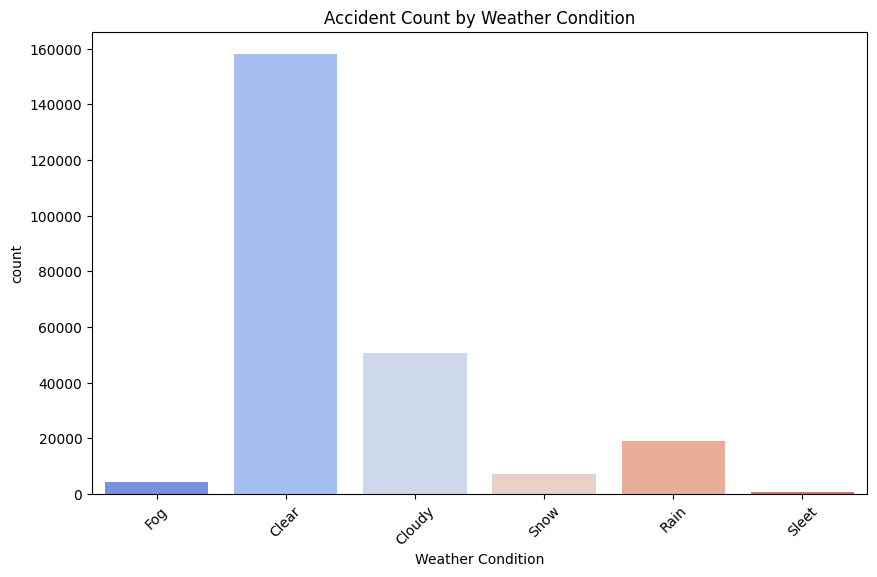

In [28]:
# Analyze patterns based on Weather Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather Condition', palette='coolwarm')
plt.title('Accident Count by Weather Condition')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-0bab6b7c4297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Track Type', palette='viridis')


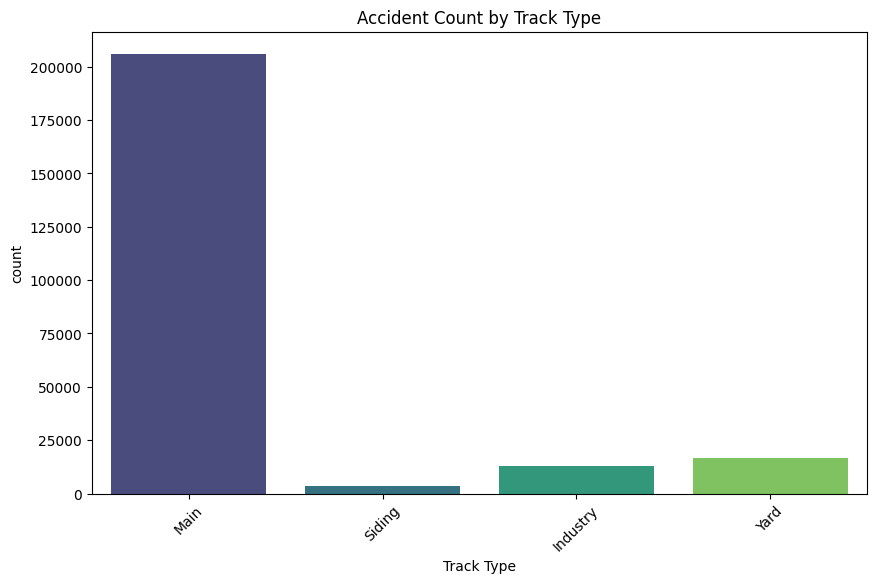

In [29]:
# Analyze patterns based on Track Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Track Type', palette='viridis')
plt.title('Accident Count by Track Type')
plt.xticks(rotation=45)
plt.show()

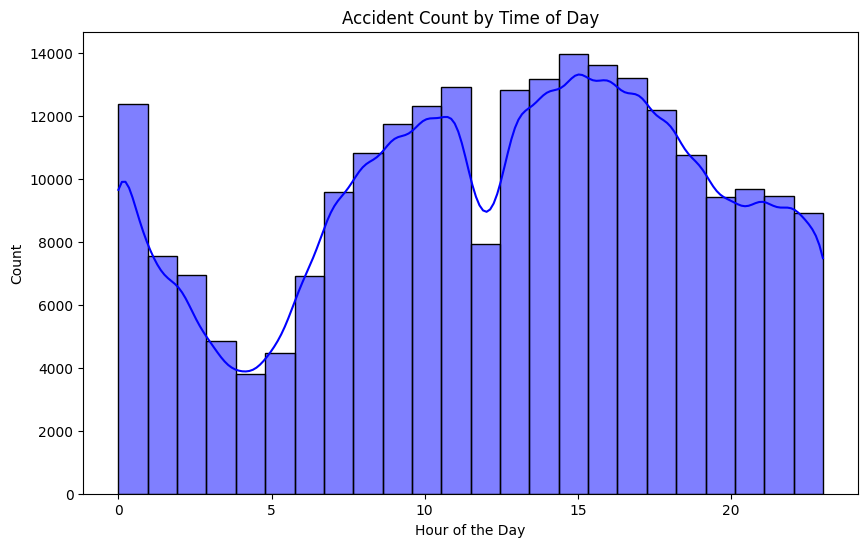

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time of Day', bins=24, kde=True, color='blue')
plt.title('Accident Count by Time of Day')
plt.xlabel('Hour of the Day')
plt.show()

<ipython-input-37-59ded294333e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='State Name', palette='plasma', order=df['State Name'].value_counts().index)


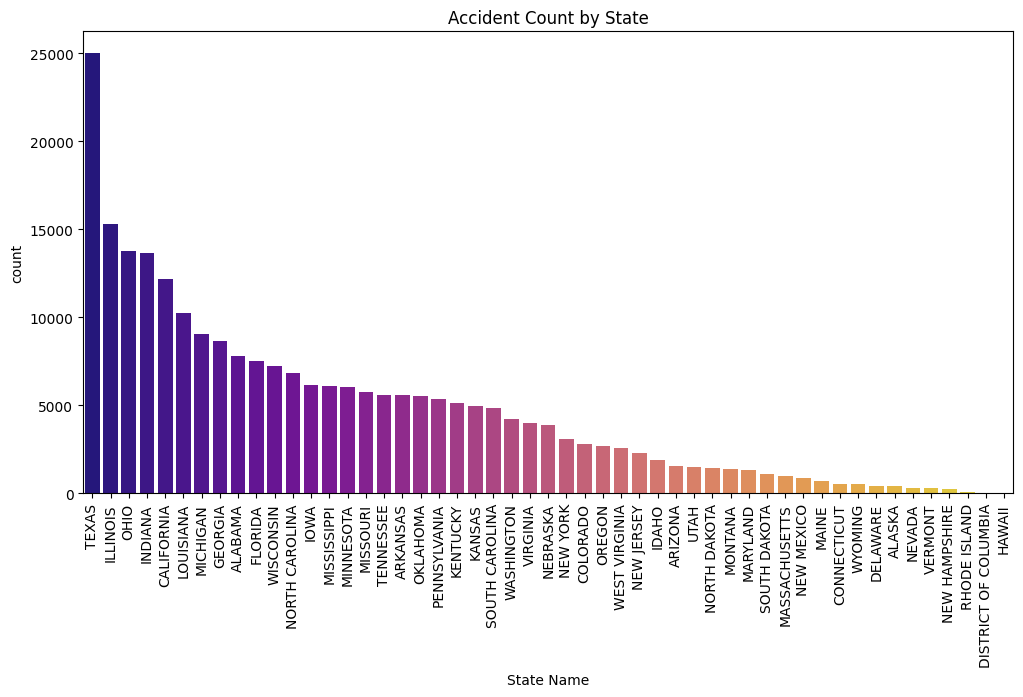

In [37]:
# Accident analysis by region (State Name or County Name)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='State Name', palette='plasma', order=df['State Name'].value_counts().index)
plt.title('Accident Count by State')
plt.xticks(rotation=90)
plt.show()



<ipython-input-38-a5ba8cda7289>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='County Name', palette='magma', order=df['County Name'].value_counts().index[:15])  # Top 15 counties


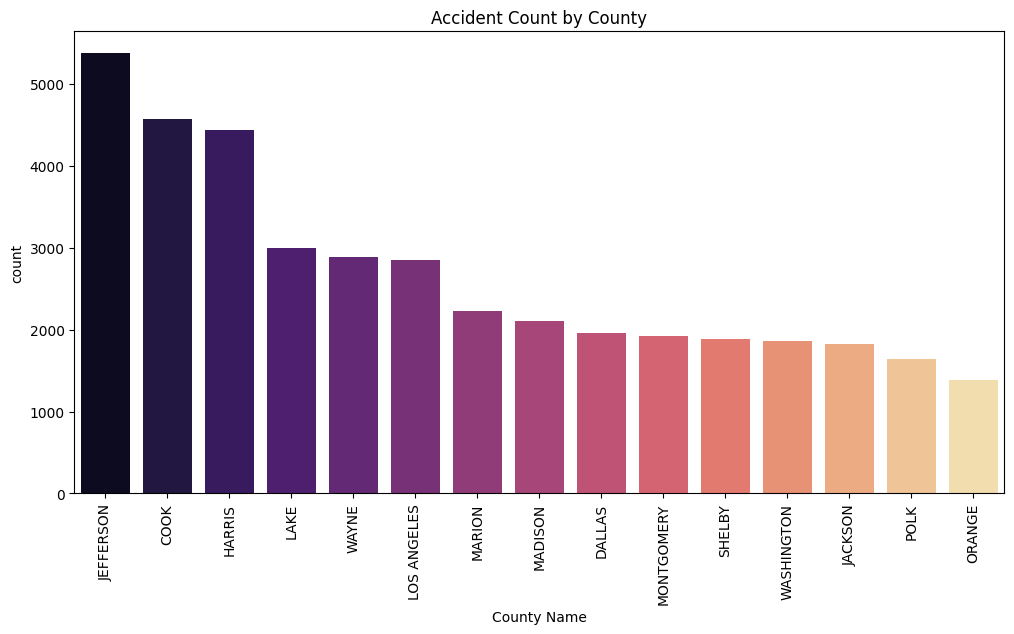

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='County Name', palette='magma', order=df['County Name'].value_counts().index[:15])  # Top 15 counties
plt.title('Accident Count by County')
plt.xticks(rotation=90)
plt.show()

<ipython-input-39-e0be8b2c96a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='City Name', palette='viridis', order=df['City Name'].value_counts().index[:15])  # Top 15 cities


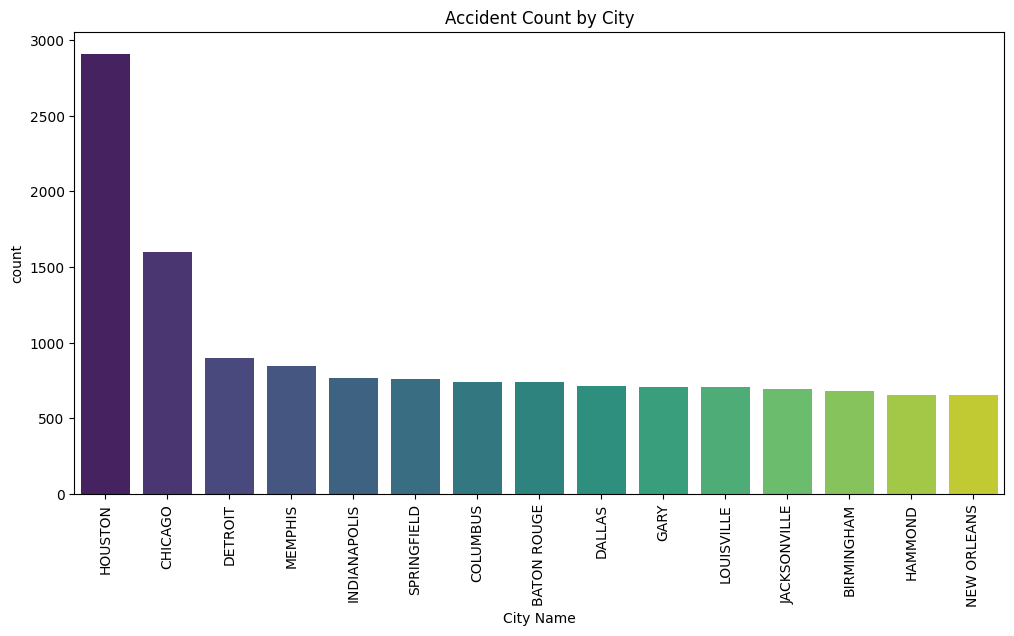

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City Name', palette='viridis', order=df['City Name'].value_counts().index[:15])  # Top 15 cities
plt.title('Accident Count by City')
plt.xticks(rotation=90)
plt.show()